#### Red Wine Quality Dataset
[Click here to access Kaggle Red Wine Quality Dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/felix/Downloads/winequality-red.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [5]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}

In [6]:
# you can use the map function of pandas with any dictionary to convert the values in a given 
# column to values in the dictionary
df["quality"] = df.quality.map(quality_mapping)

In [7]:
df.quality.describe()

count    1599.000000
mean        2.636023
std         0.807569
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: quality, dtype: float64

In [8]:
#### Splitting the dataset

In [9]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [10]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=1000)
# choose the columns you want to train on these are the features for the model
cols = list(set(df.columns) - set(['quality']))
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3, random_state=1000)

In [11]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [12]:
print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  0.615
test accuracy:  0.5609348914858097


### Try for different max_dept parameter

In [13]:
train_accuracies = []
test_accuracies = []
for max_depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=1000)
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracies.append(metrics.accuracy_score(df_train.quality, train_predictions))
    test_accuracies.append(metrics.accuracy_score(df_test.quality, test_predictions))
    
    

### Visuals

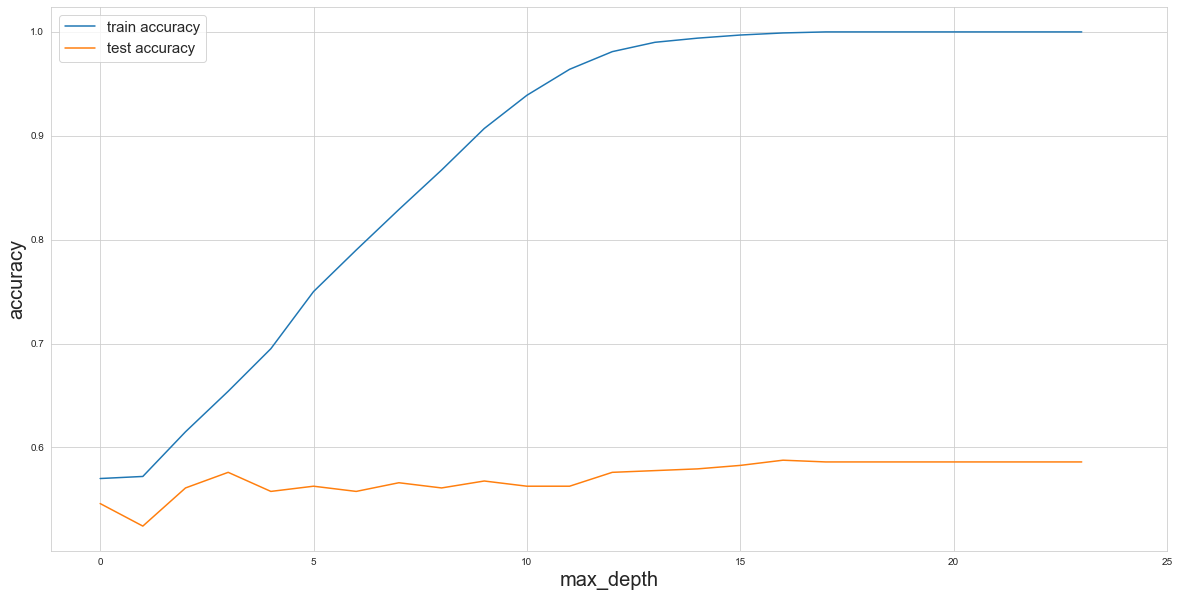

In [14]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

### Overfitting example
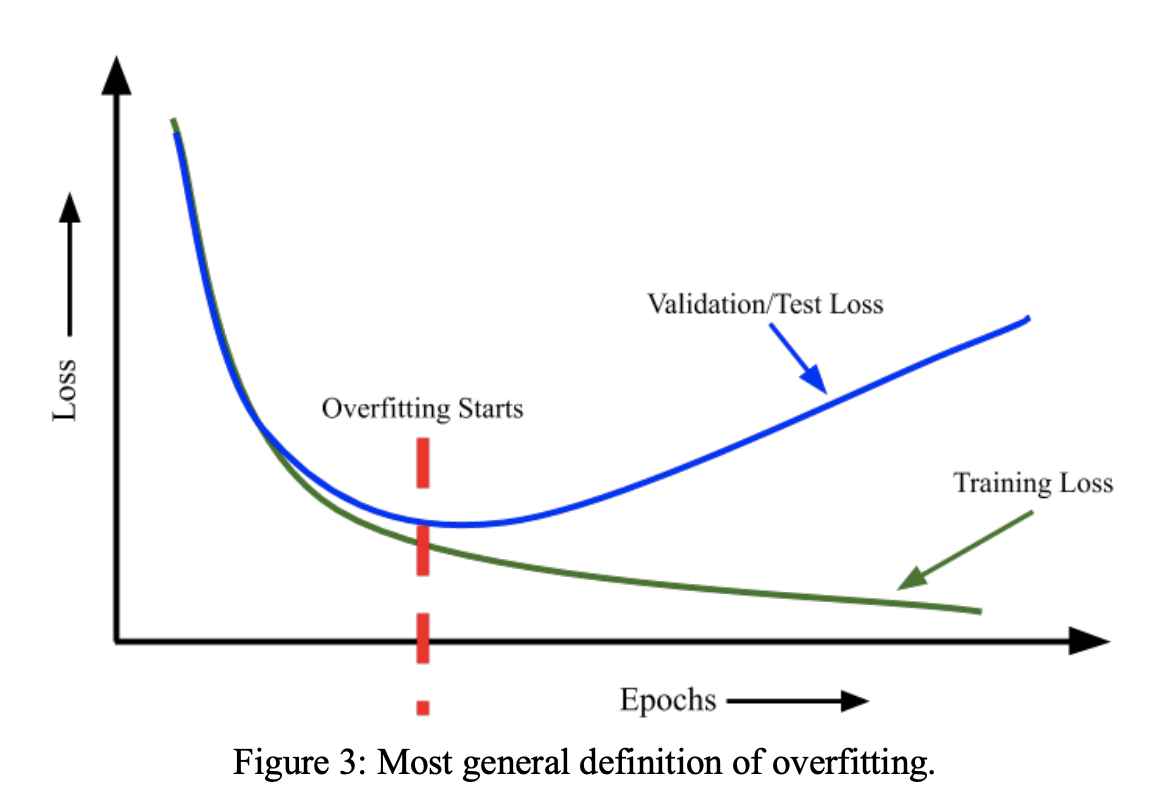

### K Fold Cross Validation

In [16]:
from sklearn import model_selection
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [25]:
kf.split(X=df)

<generator object _BaseKFold.split at 0x13740b150>

In [28]:
df.shape

(1599, 13)

In [29]:
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    #print(fold)
    #print(trn_)
    #print(val_)
    df.loc[val_, 'kfold'] = fold
    
    
# 
# # save the new csv with kfold column
# df.to_csv("train_folds.csv", index=False)

In [33]:
df.kfold.describe()

count    1599.000000
mean        1.998749
std         1.414213
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: kfold, dtype: float64

You can use this process with almost all kinds of datasets. For example, when you have images, you can create a CSV with image id, image location and image label and use the process above.

### Stratified kfold

```model_selection.StratifiedKFold``` expects a column ```target```

In [41]:
df.rename(columns={'quality': 'target'}, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
 12  kfold                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [43]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
 # fetch targets
y = df.target.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

In [44]:
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [47]:
for fold in df['kfold'].unique():
    temp_df = df[df['kfold'] == fold]
    print(temp_df.target.value_counts())

2    137
3    128
4     39
1     11
5      3
0      2
Name: target, dtype: int64
2    136
3    127
4     40
1     11
5      4
0      2
Name: target, dtype: int64
2    136
3    127
4     40
1     11
5      4
0      2
Name: target, dtype: int64
2    136
3    128
4     40
1     10
5      4
0      2
Name: target, dtype: int64
2    136
3    128
4     40
1     10
5      3
0      2
Name: target, dtype: int64


## Large Datasets

But what should we do if we have a large amount of data? Suppose we have 1 million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a **hold-out based validation.**

**The process for creating the hold-out remains the same as stratified k-fold**. For a dataset which has 1 million samples, we can create ten folds instead of 5 and keep one of those folds as hold-out. This means we will have 100k samples in the holdout, and we will always calculate loss, accuracy and other metrics on this set and
train on 900k samples.

Hold-out is also used very frequently with **time-series data**

## Small Datasets

In many cases, we have to deal with small datasets and creating big validation sets means losing a lot of data for the model to learn. In those cases, we can opt for a **type of k-fold cross-validation where k=N, where N is the number of samples in the dataset**. 

This means that in all folds of training, we will be training on *all data samples except 1*. The number of folds for this type of cross-validation is the same as the number of samples that we have in the dataset. 

One should note that this type of cross-validation can be **costly in terms of the time it takes** if the model is not fast enough, but since it’s only preferable to use this cross-validation *for small datasets, it doesn’t matter much.*

## Straified KFold for Regression

To use stratified k-fold for a regression problem, we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems. There are several choices for selecting the appropriate number of bins. If you **have a lot of samples**( > 10k, > 100k), then you don’t need to care about the number of bins. **Just divide the data into 10 or 20 bins**

If you do not have a lot of samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate number of bins.

**Sturge’s rule:**
```Number of Bins = 1 + log2(N)``` *Where N is the number of samples you have in your dataset*

In [51]:
def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    # bin targets
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column, note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
        # drop the bins column
        data = data.drop("bins", axis=1)
        # return dataframe with folds
        return data

In [56]:
from sklearn import datasets
# we create a sample dataset with 15000 samplesvand 100 features and 1 target

X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
# create a dataframe out of our numpy arrays
df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y

In [57]:
# create folds
df = create_folds(df)